# Mapping geopolitics of germany

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd


In [2]:
geopData = gpd.read_file("./map/plz-5stellig.shp")
geopData.rename(columns={'plz': 'geo_plz'}, inplace=True)
geopData.drop(columns='note', inplace=True)
geopData['EinwDensity']=geopData['einwohner']/geopData['qkm']
geopData.head()


,geo_plz,einwohner,qkm,geometry,EinwDensity
0,81248,121,1.984763,"POLYGON ((11.39468 48.14729, 11.3949 48.1478, ...",60.964458
1,60315,0,0.017481,"POLYGON ((8.67254 50.11264, 8.67259 50.11264, ...",0.000000
2,24988,3350,36.491463,"POLYGON ((9.36586 54.69994, 9.36683 54.70014, ...",91.802294
3,93185,1786,32.873844,"POLYGON ((12.47666 49.13598, 12.47702 49.13637...",54.328907
4,93489,2622,38.597260,"POLYGON ((12.54904 49.19318, 12.54953 49.19371...",67.932283


In [3]:
plz_by_region=pd.read_csv("./data/Germany_complete_gis_info.csv") # If i want to add lat and long
plz_by_region.rename(columns={'Postal Code': 'geo_plz'}, inplace=True)
#print(plz_by_region.info())
plz_by_region.head()


,Country,geo_plz,Unnamed: 2,Administrative Division,State,State Shortcut,admin name2,admin code2,District,Ofc Municipality Key,lat,long,"accuracy : accuracy of lat/lng from 1=estimated, 4=geonameid, 6=centroid of addresses or shape"
0,DE,1945,1945,Schwarzbach,Brandenburg,BB,NaN,0,Landkreis Oberspreewald-Lausitz,12066,51.4500,13.9333,NaN
1,DE,1945,1945,Hermsdorf,Brandenburg,BB,NaN,0,Landkreis Oberspreewald-Lausitz,12066,51.4055,13.8937,4.0
2,DE,1945,1945,Ruhland,Brandenburg,BB,NaN,0,Landkreis Oberspreewald-Lausitz,12066,51.4576,13.8664,4.0
3,DE,1945,1945,Hohenbocka,Brandenburg,BB,NaN,0,Landkreis Oberspreewald-Lausitz,12066,51.4310,14.0098,4.0
4,DE,1945,1945,Guteborn,Brandenburg,BB,NaN,0,Landkreis Oberspreewald-Lausitz,12066,51.4167,13.9333,4.0


In [4]:
''' Top 15 districts by total population '''
plz_by_region['geo_plz']=plz_by_region['geo_plz'].astype('int64')
geopData['geo_plz']=geopData['geo_plz'].astype('int64')
geopData = pd.merge(geopData, plz_by_region[['geo_plz','State', 'District']], on=['geo_plz'], how='inner').drop_duplicates()

district_pop=geopData.groupby('District')['einwohner'].sum().reset_index()
district_pop.rename(columns={'einwohner': 'DistrictEinwohner'}, inplace=True)

top_population = district_pop.nlargest(15, 'DistrictEinwohner',keep='first').reset_index()
top_population

,index,District,DistrictEinwohner
0,15,"Berlin, Stadt",3327436
1,72,"Hamburg, Freie und Hansestadt",1714262
2,123,Kreisfreie Stadt München,1348282
3,325,Region Hannover,1102881
4,130,"Köln, Stadt",1006001
5,90,Karlsruhe,713553
6,58,"Frankfurt am Main, Stadt",668287
7,323,Recklinghausen,619989
8,41,"Düsseldorf, Stadt",586399
9,363,Stuttgart,585791


In [5]:
geopData = pd.merge(geopData, district_pop[['District','DistrictEinwohner']], on=['District']).drop_duplicates()

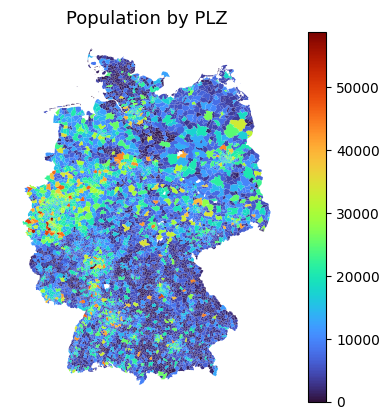

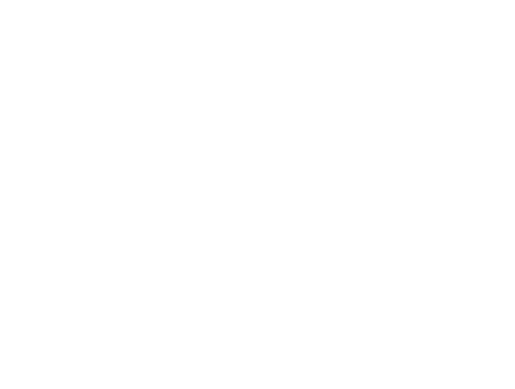

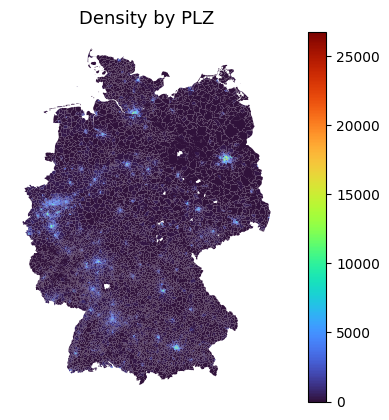

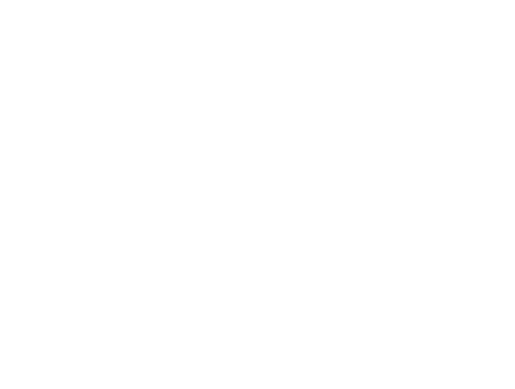

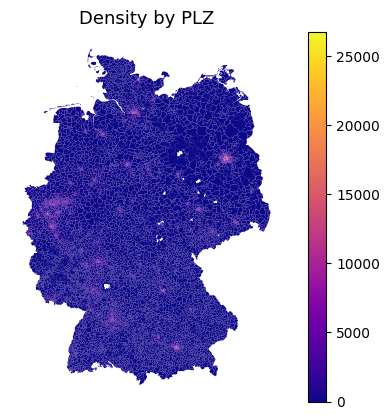

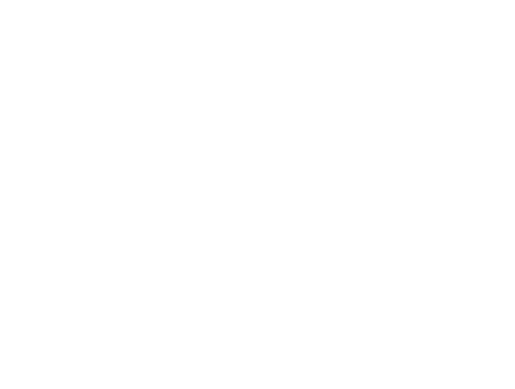

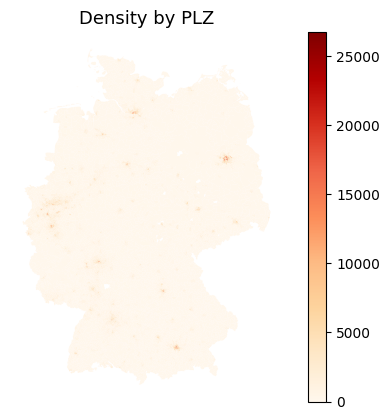

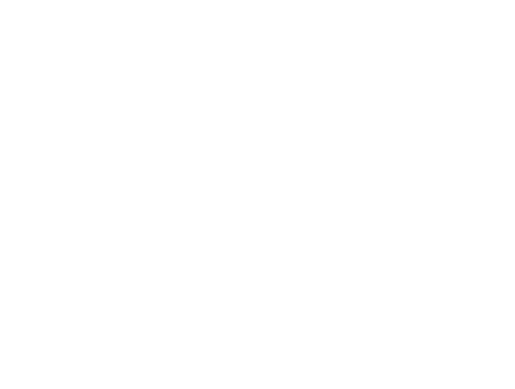

In [21]:
fig, ax = plt.subplots(1)
ax.axis('off')
ax.set_title('Population by PLZ', fontsize=13)
geopData.plot(column='einwohner',cmap='turbo', figsize=(18,18),
                      ax=ax,
                      legend=True,
                      edgecolor = None)
plt.show()
plt.axis('off')
fig.savefig('./img/PopulationByPLZ_turbo.png', format='png',dpi=150)
plt.show()




fig, ax = plt.subplots(1)
ax.axis('off')
ax.set_title('Density by PLZ', fontsize=13)
geopData.plot(column='EinwDensity',cmap='turbo', figsize=(18,18),
                      ax=ax,
                      legend=True,
                      edgecolor = None)
plt.show()
plt.axis('off')
fig.savefig('./img/DensityByDistrict_turbo.png', format='png',dpi=150)




fig, ax = plt.subplots(1)
ax.axis('off')
ax.set_title('Density by PLZ', fontsize=13)
geopData.plot(column='EinwDensity',cmap='plasma', figsize=(18,18),
                      ax=ax,
                      legend=True,
                      edgecolor = None)
plt.show()
plt.axis('off')
fig.savefig('./img/DensityByDistrict_plasma.png', format='png',dpi=150)


fig, ax = plt.subplots(1)
ax.axis('off')
ax.set_title('Density by PLZ', fontsize=13)
geopData.plot(column='EinwDensity',cmap='OrRd', figsize=(18,18),
                      ax=ax,
                      legend=True,
                      edgecolor = None)
plt.show()
plt.axis('off')
fig.savefig('./img/DensityByDistrict_orrd.png', format='png',dpi=150)

In [26]:
import plotly.express as px

fig = px.choropleth_mapbox(
    geopData,
    geojson=geopData.geometry,
    locations=geopData.index,
    color='EinwDensity',
    hover_data=["geo_plz"],  # Add the 'plz' column to the hover data
    mapbox_style="carto-positron",
    color_continuous_scale="turbo",  # Choose a suitable color scale,
    zoom=6,
    center={"lat": 51.1657, "lon": 10.4515},
    opacity=0.9,
    labels={'Population Density'},
)

fig.update_layout(
    margin={"r": 0, "t": 0, "l": 0, "b": 0},
    coloraxis_colorbar=dict(title="'Density p. sqkm"),
)

fig.update_geos(fitbounds="locations", visible=False)

fig.write_html("./img/EinwDensity_interactive_graph.html")

print('done')

done


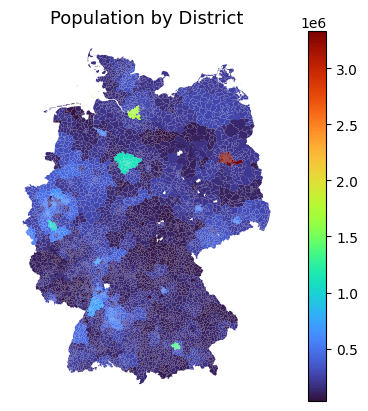

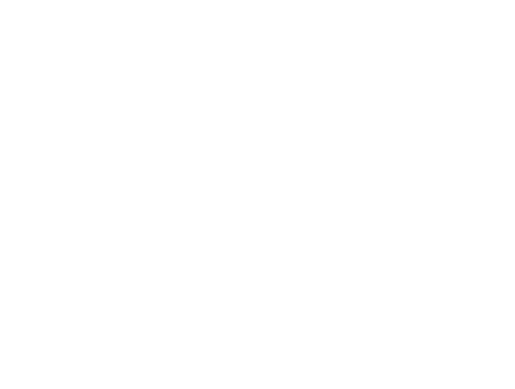

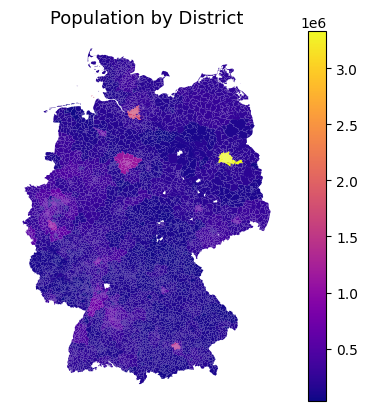

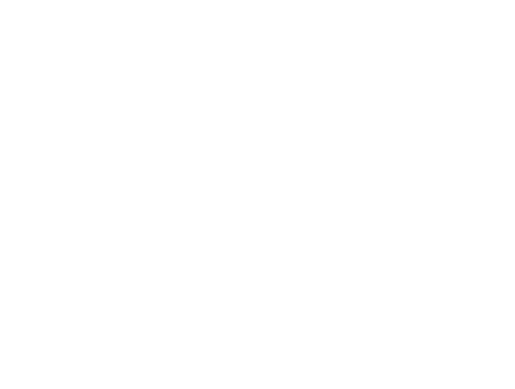

In [7]:
fig, ax = plt.subplots(1)
ax.axis('off')
ax.set_title('Population by District', fontsize=13)
geopData.plot(column='DistrictEinwohner', figsize=(18,18),
                      ax=ax,
                      legend=True,
                      cmap = 'turbo',
                      edgecolor = None)
plt.show()
plt.axis('off')
fig.savefig('./img/PopulationByDistrict.png', format='png',dpi=150)
plt.show()


fig, ax = plt.subplots(1)
ax.axis('off')
ax.set_title('Population by District', fontsize=13)
geopData.plot(column='DistrictEinwohner', figsize=(18,18),
                      ax=ax,
                      legend=True,
                      cmap = 'turbo',
                      edgecolor = None)
plt.show()
plt.axis('off')
fig.savefig('./img/PopulationByDistrict.png', format='png',dpi=150)
plt.show()



fig, ax = plt.subplots(1)
ax.axis('off')
ax.set_title('Population by District', fontsize=13)
geopData.plot(column='DistrictEinwohner', figsize=(18,18),
                      ax=ax,
                      legend=True,
                      cmap = 'plasma',
                      edgecolor = None)
plt.show()
plt.axis('off')
fig.savefig('./img/PopulationByDistrict_plasma.png', format='png',dpi=150)
plt.show()

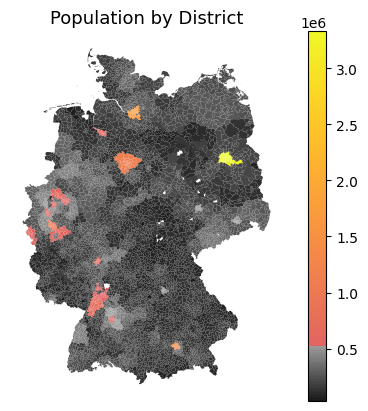

In [35]:
def stiched_colormap(c1, c2, stich_point):
    from matplotlib.colors import ListedColormap
    import numpy as np

    # Ensure stitch_point is within valid range
    if not (0.0 < stich_point < 1.0):
        raise ValueError("stich_point must be between 0.0 and 1.0")

    # Set subsampling factors
    subsample_factor1 = stich_point
    subsample_factor2 = 1 - subsample_factor1

    # Compute new array length and interpolate colors for the first colormap
    new_length1 = round(subsample_factor1 * len(c1))
    new_cmap1 = np.array([np.interp(np.linspace(0, 1, new_length1), np.linspace(0, 1, len(c1)), c1[:, i]) for i in range(c1.shape[1])]).T

    # Compute new array length and interpolate colors for the second colormap
    new_length2 = round(subsample_factor2 * len(c2))
    new_cmap2 = np.array([np.interp(np.linspace(0, 1, new_length2), np.linspace(0, 1, len(c2)), c2[:, i]) for i in range(c2.shape[1])]).T

    # Combine the two parts
    combined_colors = np.vstack((new_cmap1, new_cmap2))

    # Create a new ListedColormap with the combined colors
    cdis = ListedColormap(combined_colors)
    return cdis

def interpolate_colormap(cmap, num_colors, vmin=0, vmax=1):
    import numpy as np
    
    # Ensure vmin and vmax are within valid range
    if not (0 <= vmin < vmax <= 1):
        raise ValueError("vmin and vmax must be between 0 and 1, and vmin must be less than vmax")

    # Generate the interpolated colormap within the specified range
    interp_range = np.linspace(vmin, vmax, num_colors)
    interpolated_cmap = np.array([np.interp(interp_range, np.linspace(0, 1, len(cmap)), cmap[:, i]) for i in range(cmap.shape[1])]).T
    
    return interpolated_cmap

cmap1 = plt.get_cmap('gray')(np.linspace(0, 1, 256))[:, :3]  # Use only RGB values
cmap2 = plt.get_cmap('plasma')(np.linspace(0, 1, 256))[:, :3]   # Use only RGB 
cmap1 = interpolate_colormap(cmap1, 256, vmin=0.1, vmax=0.6)
cmap2 = interpolate_colormap(cmap2, 256, vmin=0.6, vmax=1)

stich_point=5e5/geopData['DistrictEinwohner'].max()
cdis=stiched_colormap(cmap1, cmap2, stich_point)

fig, ax = plt.subplots(1)
ax.axis('off')
ax.set_title('Population by District', fontsize=13)
geopData.plot(column='DistrictEinwohner', figsize=(18,18),
                      ax=ax,
                      legend=True,
                      cmap = cdis,
                      edgecolor = None)
plt.show()
fig.savefig('./img/PopulationByDistrict_NiceColormap2.png', format='png',dpi=150)


In [10]:
#geopData.to_csv('./data/german_geopolitical_data.csv', index=False)
geopData.to_file('./data/german_geopolitical_data.shp')  # Save as Shapefile

C:\Users\Alexis\AppData\Local\Temp\ipykernel_21712\4275184669.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  geopData.to_file('./data/german_geopolitical_data.shp')  # Save as Shapefile
C:\DEV\SharedAppartmentCalculator\SharedAppartmentCalculator\.venv\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'EinwDensity' to 'EinwDensit'
  ogr_write(
C:\DEV\SharedAppartmentCalculator\SharedAppartmentCalculator\.venv\Lib\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'DistrictEinwohner' to 'DistrictEi'
  ogr_write(
